<img style="float: right;" src="https://www.duoc.cl/wp-content/uploads/2021/03/logos_sedesv1-23.png" width="300" height="300">

## <center> ¿Lloverá en Australia?
    
### Integrantes: 
#### Rafael Araya, Paola Arcos, Ivette Poblete, Marco Salinas, Esteban Varas.
    

## Contexto:
Australia es uno de los países con mayor extensión del mundo y el continente más seco y llano del planeta. El clima predominante es el desértico y semiárido, las principales características climáticas australianas son inviernos suaves y veranos cálidos, así como abundante sol y poca humedad. Las precipitaciones son muy escasas en el interior y aumentan en las zonas costeras, de modo que las zonas mejor regadas son los litorales norte, este, sudeste y sudoeste. 

Se dispone de un set de datos de observaciones meteorológicas diarias de múltiples ubicaciones en Australia, obtenidas de la Oficina de Meteorología de la Commonwealth de Australia y procesadas que crearon este conjunto de datos de muestra, los datos se han procesado y nos proporcionaron nuestra variable objetivo RainTomorrow(si hay lluvia al día siguiente - No / Sí)


In [1]:
import numpy as np
import pandas as pd

#Instalar <conda install -c plotly plotly=4.8.1 en el promt de anaconda>
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#modelos
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# 1. EDA

In [2]:
data = pd.read_csv('weatherAUS.csv')
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ...        22.0   
1            NaN         WNW           44.0        NNW  ...        25.0   
2            NaN         WSW           46.0          W  ...        30.0   
3            NaN          NE           24.0         SE  ...        16.0   
4            NaN           W           41.0        ENE  ...        33.0   
...          ...         ...            ...        ...  ...         ...   
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
0              No      0.0            No  
1              No      0.0            No  
2              No      0.0            No  
3              No      1.0            No  
4              No      0.2            No  
...           ...      ...           ...  
142188         No      0.0            No  
142189         No      0.0            No  
142190         No      0.0            No  
142191         No      0.0            No  
142192         No      0.0            No  

[142193 rows x 24 columns]

*🡅 Aquí se puede ver un ejemplo de los datos entregados 🡅*

In [3]:
data.shape

(142193, 24)

*🡅 Existe un total de 142193 columnas y 24 filas de datos 🡅*

In [4]:
for feature in data.columns:
    print('Total de valores nulos de', feature, '=', data[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 637
Total de valores nulos de MaxTemp = 322
Total de valores nulos de Rainfall = 1406
Total de valores nulos de Evaporation = 60843
Total de valores nulos de Sunshine = 67816
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 9270
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 1348
Total de valores nulos de WindSpeed3pm = 2630
Total de valores nulos de Humidity9am = 1774
Total de valores nulos de Humidity3pm = 3610
Total de valores nulos de Pressure9am = 14014
Total de valores nulos de Pressure3pm = 13981
Total de valores nulos de Cloud9am = 53657
Total de valores nulos de Cloud3pm = 57094
Total de valores nulos de Temp9am = 904
Total de valores nulos de Temp3pm = 2726
Total de valores nulos de RainToday = 1406
Total de valores nulos de RISK_MM = 0
Total de val

*🡅 Aquí se puede visualizar la cantidad de datos nulos que hay por variable, la variable con mayor cantidad de nulos es "Sunshine" 🡅*

#### Datos discretos

In [5]:
data.select_dtypes('object')

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0       2008-12-01   Albury           W          W        WNW        No   
1       2008-12-02   Albury         WNW        NNW        WSW        No   
2       2008-12-03   Albury         WSW          W        WSW        No   
3       2008-12-04   Albury          NE         SE          E        No   
4       2008-12-05   Albury           W        ENE         NW        No   
...            ...      ...         ...        ...        ...       ...   
142188  2017-06-20    Uluru           E        ESE          E        No   
142189  2017-06-21    Uluru           E         SE        ENE        No   
142190  2017-06-22    Uluru         NNW         SE          N        No   
142191  2017-06-23    Uluru           N         SE        WNW        No   
142192  2017-06-24    Uluru          SE        SSE          N        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
142188           No  
142189           No  
142190           No  
142191           No  
142192           No  

[142193 rows x 7 columns]

*🡅 Las variables que contienen datos son 7: "Date", "Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow" 🡅*

#### Datos continuos

In [6]:
data.select_dtypes('float')

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          NaN       NaN           44.0   
1           7.4     25.1       0.0          NaN       NaN           44.0   
2          12.9     25.7       0.0          NaN       NaN           46.0   
3           9.2     28.0       0.0          NaN       NaN           24.0   
4          17.5     32.3       1.0          NaN       NaN           41.0   
...         ...      ...       ...          ...       ...            ...   
142188      3.5     21.8       0.0          NaN       NaN           31.0   
142189      2.8     23.4       0.0          NaN       NaN           31.0   
142190      3.6     25.3       0.0          NaN       NaN           22.0   
142191      5.4     26.9       0.0          NaN       NaN           37.0   
142192      7.8     27.0       0.0          NaN       NaN           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
142188          15.0          13.0         59.0         27.0       1024.7   
142189          13.0          11.0         51.0         24.0       1024.6   
142190          13.0           9.0         56.0         21.0       1023.5   
142191           9.0           9.0         53.0         24.0       1021.0   
142192          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  
0            1007.1       8.0       NaN     16.9     21.8      0.0  
1            1007.8       NaN       NaN     17.2     24.3      0.0  
2            1008.7       NaN       2.0     21.0     23.2      0.0  
3            1012.8       NaN       NaN     18.1     26.5      1.0  
4            1006.0       7.0       8.0     17.8     29.7      0.2  
...             ...       ...       ...      ...      ...      ...  
142188       1021.2       NaN       NaN      9.4     20.9      0.0  
142189       1020.3       NaN       NaN     10.1     22.4      0.0  
142190       1019.1       NaN       NaN     10.9     24.5      0.0  
142191       1016.8       NaN       NaN     12.5     26.1      0.0  
142192       1016.5       3.0       2.0     15.1     26.0      0.0  

[142193 rows x 17 columns]

*🡅 Se puede ver que la mayor cantidad de datos son datos continuos, con una cantidad de 17 variables 🡅*

#### Tipos de datos 

In [7]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

*🡅 Aquí se pueden ver los tipos de datos de cada variable 🡅*

#### Variables categóricas

In [8]:
Categoricas = [i for i in data.columns if data[i].dtypes =='O']
print ('Variables Categoricas:',Categoricas)

Variables Categoricas: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#### Variables númericas

In [10]:
Numericas = [i for i in data.columns if i not in Categoricas]
print ('Variables numericas :', Numericas)

Variables numericas : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


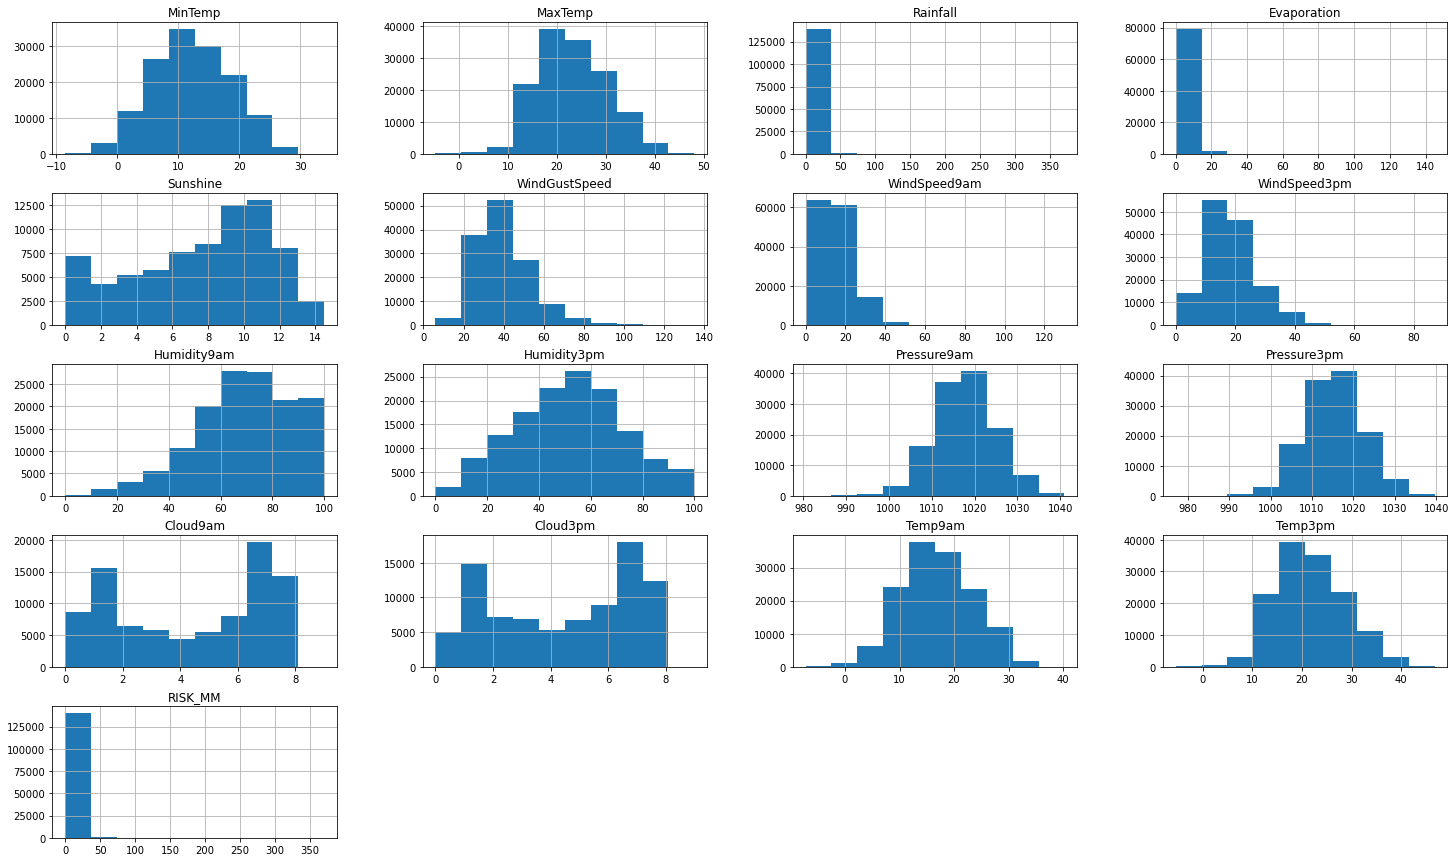

In [11]:
data[Numericas].hist(bins=10, figsize= (25,15))
plt.savefig("Distribucion de variables numericas.png")
plt.show()

Aquí se puede visualizar los tipos de distribuciones que tiene cada variable númerica 

In [149]:
#data['MinTemp'].plot.hist();

In [150]:
#data['Humidity9am'].plot.hist();

In [151]:
#data['Sunshine'].plot.hist();

In [152]:
#data['Temp9am'].plot.hist();

In [153]:
#data['Pressure9am'].plot.hist();

## Mapa de correlación antes de las intervenciones

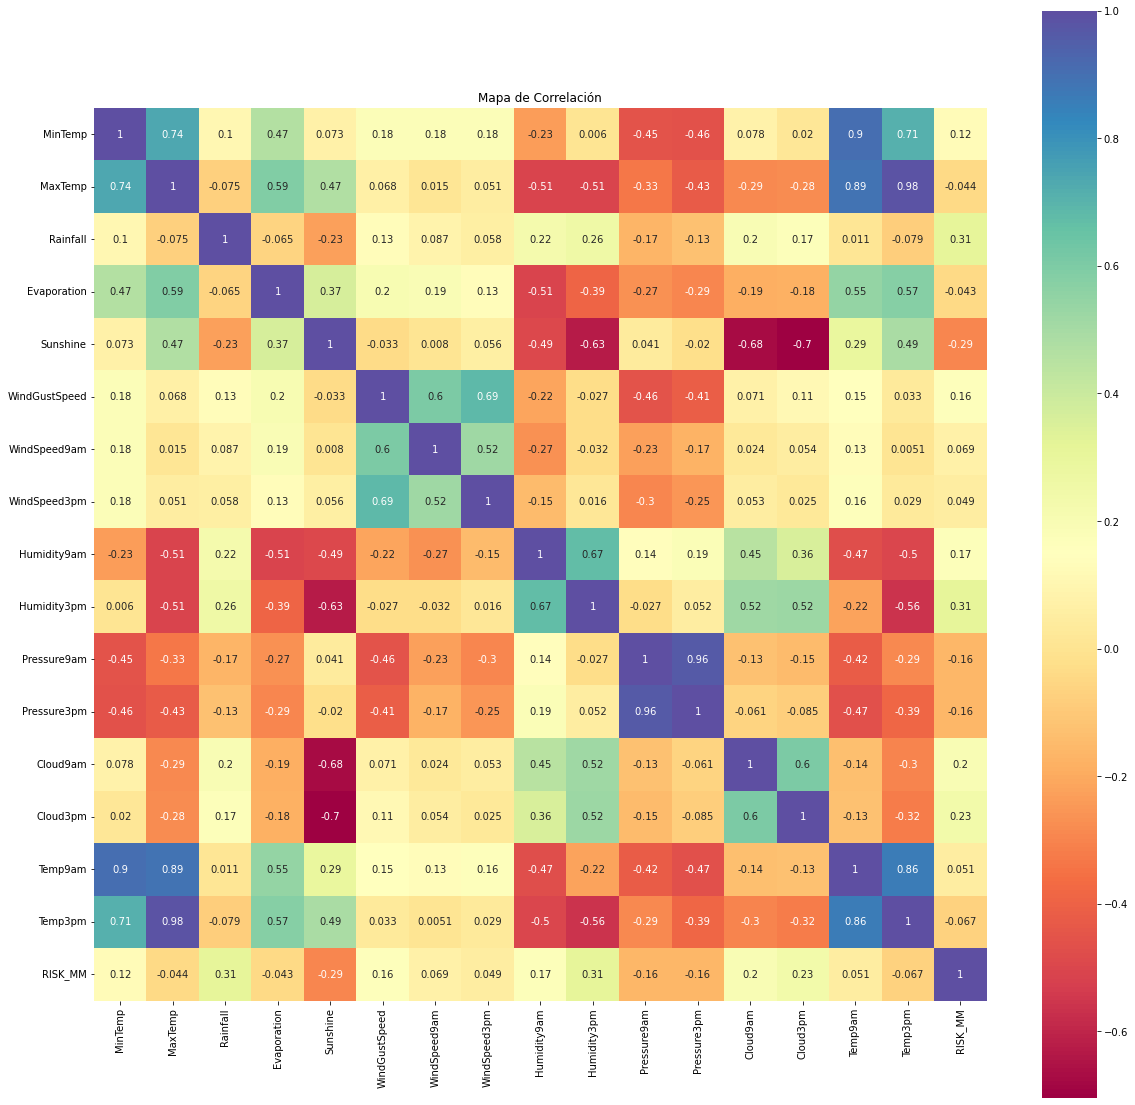

In [12]:
corr = data.corr(method ='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=corr,square=True, annot=True,cmap='Spectral').set_title ("Mapa de Correlación");

*🡅 De este gráfico se puede visualizar:*

1. Las temperaturas a las 3PM estan altamente relacionadas con las máximas temperaturas de cada dáa, de igual forma las temperatura de las 9AM, ya que, la temperatura máxima es muy parecida o es la misma temperatura que las 3 pm, la correlación es de un 0.74

2. la temperatura máxima es proporcional a la temperatura mínima, es decir, entre mas alta la temperatura máxima del día mas alta la temperatura mínima. La correlación de estas variables es 0.74

3. La Humedad de las 9AM es correlativa con la humedad de las 3pm, tiene una correlación del 0.67

4. Existe relación entre la evaporación y la temperatura de las 3 pm, mientras más temperatura exista, mayor sera la evaporación, la correlación entre estas variables es de un 0.57

In [13]:
Numericas = [i for i in data.columns if i not in Categoricas]
print ('Variables númericas :', Numericas)

Variables númericas : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


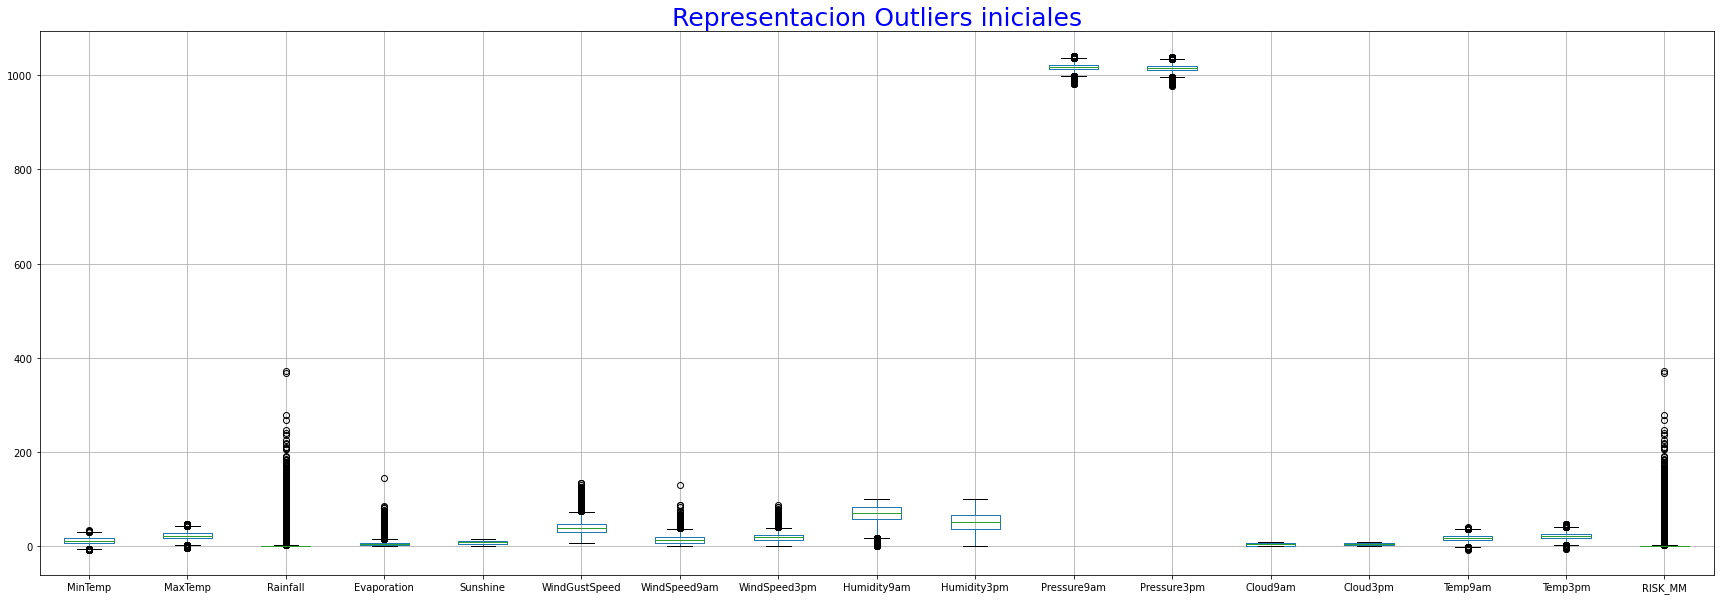

In [14]:
data[Numericas].boxplot(figsize=(30, 10))
plt.savefig('Deteccion de outliers iniciales.png')
plt.title("Representacion Outliers iniciales", fontsize=25, color="blue")
plt.show()

*🡅 Aquí se puede ver un gráfico de los outliers de todas las variables númericas, se aprecia que las variables con mayor cantidad de outliers son "Rainfall" y "Risk_MM"*

In [186]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["MinTemp"], fliersize=5, width=0.5).set_title ("Outliers variable MinTemp");
# plt.savefig('Outliers-MinTemp.png')

In [187]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["MaxTemp"], fliersize=5, width=0.5).set_title ("Outliers variable MaxTemp");
# plt.savefig('Outliers-MaxTemp.png')

In [188]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["Rainfall"], fliersize=5, width=0.5).set_title ("Outliers variable Rainfall");
# plt.savefig('Outliers-Rainfall.png')

In [189]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["Evaporation"], fliersize=5, width=0.5).set_title ("Outliers variable Evaporation");
# plt.savefig('Outliers-Evaporation.png')

In [190]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["Sunshine"], fliersize=5, width=0.5).set_title ("Outliers variable Sunshine");
# plt.savefig('Outliers-Sunshine.png')

In [191]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["WindGustSpeed"], fliersize=5, width=0.5).set_title ("Outliers variable WindGustSpeed");
# plt.savefig('Outliers-WindGustSpeed.png')

In [192]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["WindSpeed9am"], fliersize=5, width=0.5).set_title ("Outliers variable WindSpeed9am");
# plt.savefig('Outliers-WindSpeed9am.png')

In [193]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["WindSpeed3pm"], fliersize=5, width=0.5).set_title ("Outliers variable WindSpeed3pm");
# plt.savefig('Outliers-WindSpeed3pm.png')

In [194]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["Humidity9am"], fliersize=5, width=0.5).set_title ("Outliers variable MaxHumidity9amTemp");
# plt.savefig('Outliers-Humidity9am.png')

In [195]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["Humidity3pm"], fliersize=5, width=0.5).set_title ("Outliers variable Humidity3pm");
# plt.savefig('Outliers-Humidity3pm.png')

In [196]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["Pressure9am"], fliersize=5, width=0.5).set_title ("Outliers variable Pressure9am");
# plt.savefig('Outliers-Pressure9am.png')

In [197]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["Pressure3pm"], fliersize=5, width=0.5).set_title ("Outliers variable Pressure3pm");
# plt.savefig('Outliers-Pressure3pm.png')

In [198]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["Cloud9am"], fliersize=5, width=0.5).set_title ("Outliers variable Cloud9am");
# plt.savefig('Outliers-Cloud9am.png')

In [199]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["Cloud3pm"], fliersize=5, width=0.5).set_title ("Outliers variable Cloud3pm");
# plt.savefig('Outliers-Cloud3pm.png')

In [200]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["Temp9am"], fliersize=5, width=0.5).set_title ("Outliers variable Temp9am");
# plt.savefig('Outliers-Temp9am.png')

In [201]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["Temp3pm"], fliersize=5, width=0.5).set_title ("Outliers variable Temp3pm");
# plt.savefig('Outliers-Temp3pm.png')

In [202]:
# plt.figure(figsize=(15, 2))
# sns.boxplot(x=data["RISK_MM"], fliersize=5, width=0.5).set_title ("Outliers variable RISK_MM");
# plt.savefig('Outliers-RISK_MM.png')

## Intervenciones

### Eliminación de variables no usadas

In [15]:
data = data.drop(["RISK_MM"], axis = 1)

*🡅 Se elimina la variable "RISK_MM" ya que esta no interfiere en la predicción de si llueve o no 🡅*

### Transformación variables categóricas a numéricas

In [18]:
#SOLO TRANSFORMAR LAS QUE SON BOLEANAS
data['RainToday'].replace(['No','Yes'], [0,1], inplace = True)
data['RainTomorrow'].replace(['No','Yes'], [0,1], inplace = True)

#SIN DATE PQ NO SABEMOS COMO TRATARLO AÚN
Categoricas = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

#LAS VARIABLES DE "CATEGORICAS" LAS PASAMOS A DUMMIES
data = pd.get_dummies(data, columns=Categoricas)
data.shape

KeyError: "None of [Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')] are in the [columns]"

### Tratamiento de nulos

In [ ]:
#HOW

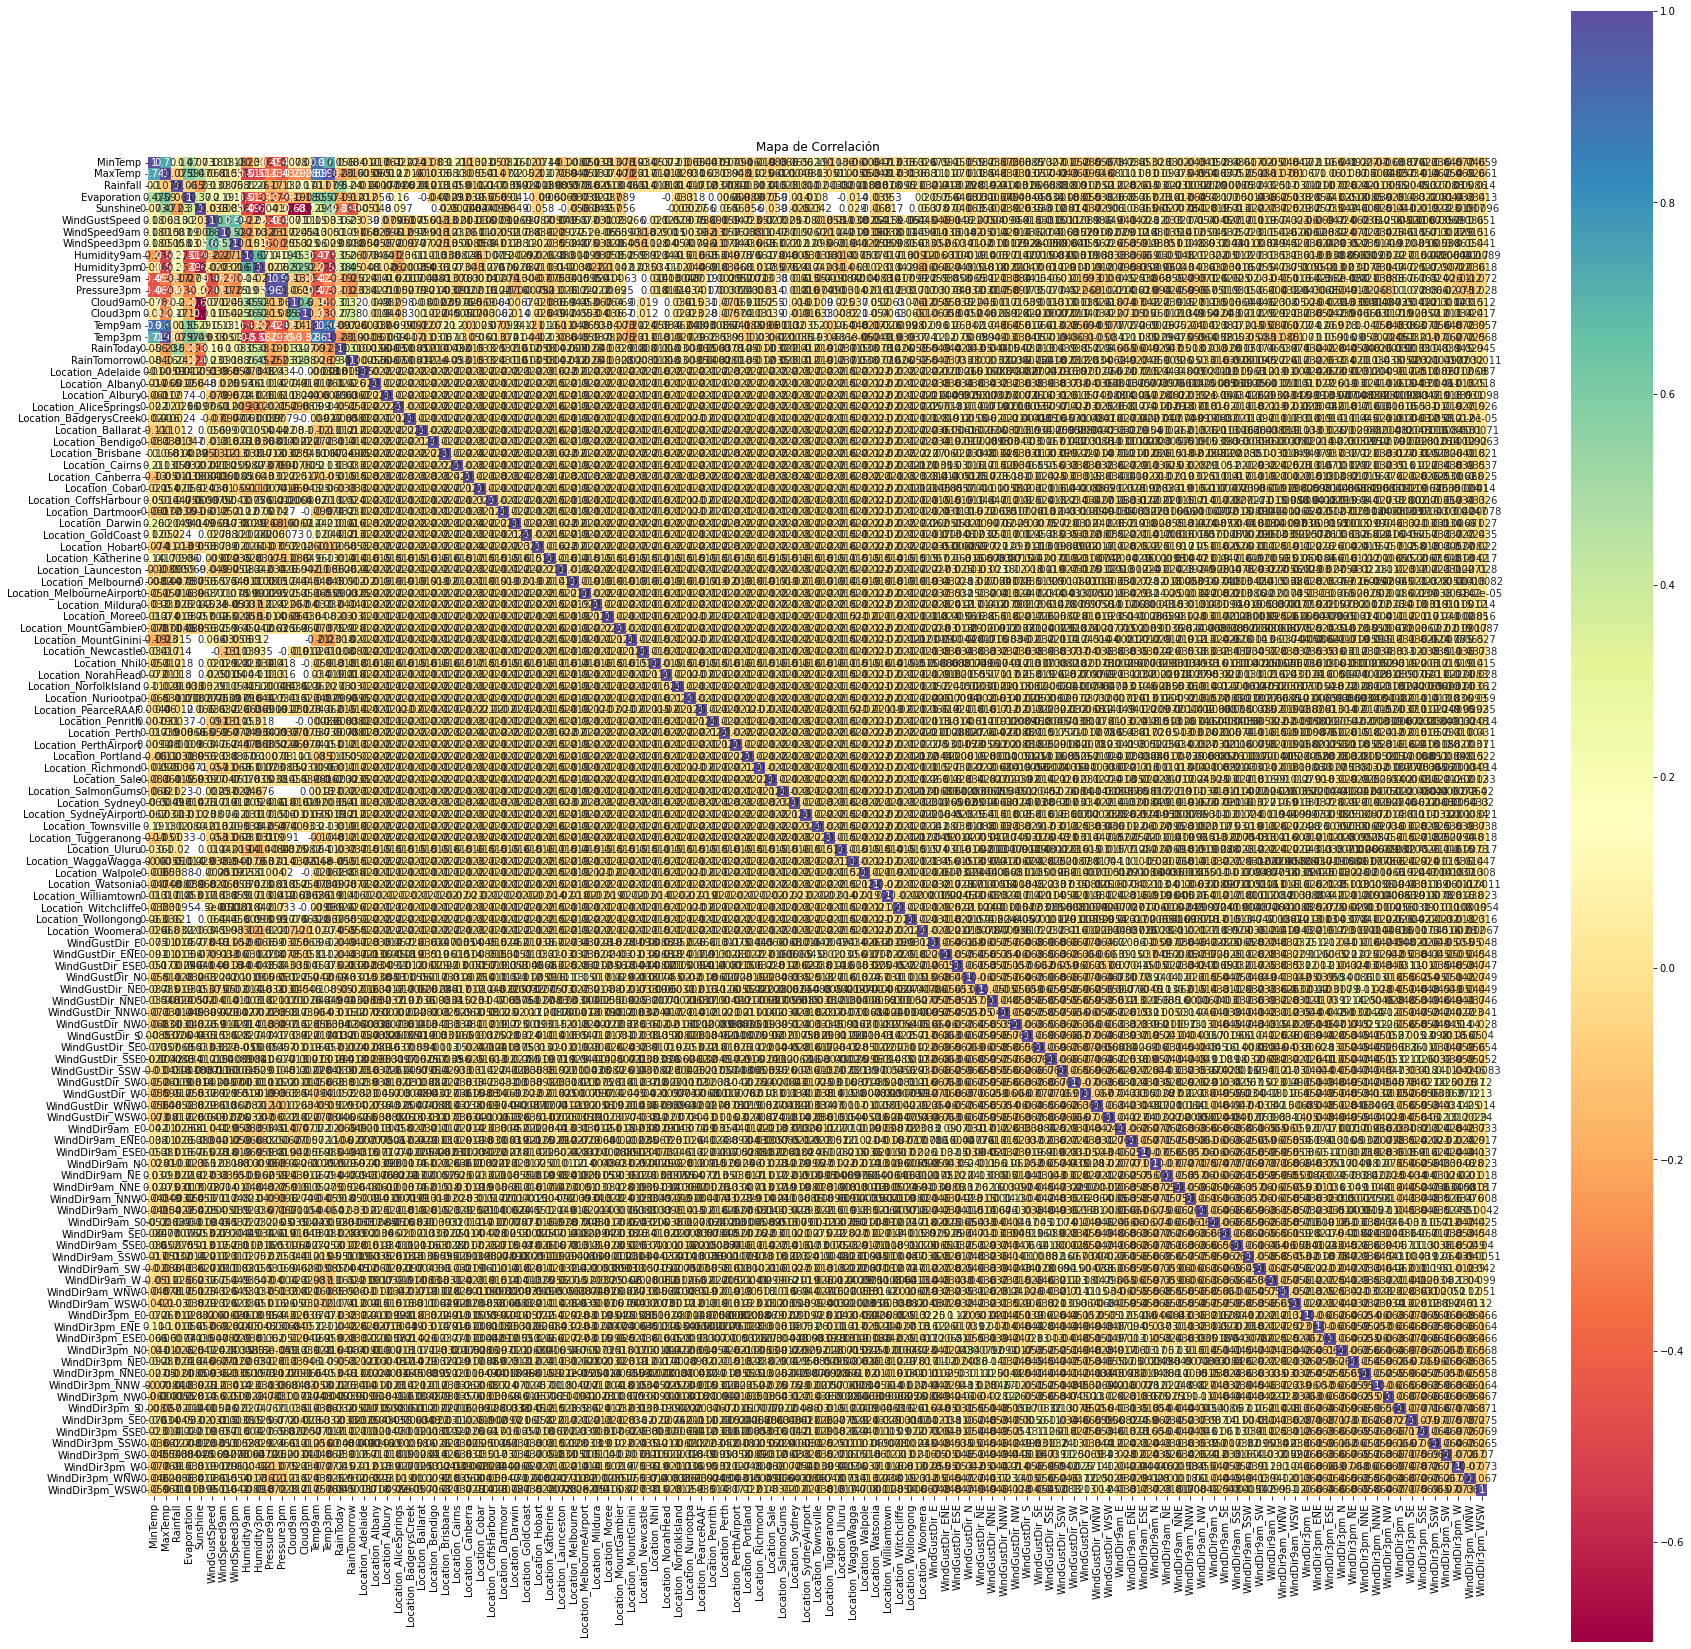

In [19]:
corr = data.corr(method ='pearson')
plt.figure(figsize=(30,30))
sns.heatmap(data=corr,square=True, annot=True,cmap='Spectral').set_title ("Mapa de Correlación");
plt.savefig('Mapa-correlacion-post.png')

In [235]:
Numericas = [i for i in data.columns if i not in Categoricas]
print ('Variables númericas :', Numericas)

Variables númericas : ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport',

In [20]:
datos_min_max = preprocessing.MinMaxScaler().fit_transform(data)
datos_min_max =pd.DataFrame(datos_min_max, columns=["Numericas"])

ValueError: could not convert string to float: '2008-12-01'